# CostPro Customer Churn

🚨 **First things first! Make a copy of this notebook. Your changes will not save unless you create your own copy!**

## 💡 Build Intuition

As a junior data scientist at CostPro, you are approaching the problem of customer churn using non-parametric tests. These tests are useful because they do not make assumptions about the underlying distribution of the data, which is important in this case as the data may not meet the assumptions of parametric tests. For example, tests like chi-squared test or the Mann-Whitney U Test analyze the relationship between different features and customer churn. By using non-parametric tests you can have a deeper understanding of the factors that contribute to customer churn at CostPro and develop strategies to mitigate it.

## 🚀 Project Jumpstart

### Dependencies

In [84]:
!pip install -qqq numpy pandas seaborn matplotlib gdown scipy

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import gdown
from typing import List, Tuple, Dict, Callable, Optional

In [86]:
# set the random seed
random_seed = 43

### 💾  Data

**💡** Build Intuition: Be sure to check out the [data dictionary!](https://docs.google.com/spreadsheets/d/1qT_DIq7Brs3t-sUgFSvV8ZU37cAKSlIbAAgCcmxCd3w/edit?usp=sharing) It will help you build intuition about what data is available to you and how you might want to use it!

#### Download the Data

Go to the shared link for the data, download it to your local machine, then upload it into colab via the files button on the left hand side. We appreciate your patience. There's an issue with file formatting when the file is imported with gdown.

https://docs.google.com/spreadsheets/d/12vt6qCUZ8C_YWHnCQ6HR9iSXiLAOHWqNlBOOaBT9hqw/edit?usp=sharing

In [87]:
# save the file as churn_data.csv or change the name here!
file_name = 'churn_data.csv'

# Download the file from co:rise google drive
unique_id = "10_5NQX4h3I4bBE3P_rTSdeZJRHxmHrKP"
gdown.download(id=unique_id, output=file_name)

Downloading...
From: https://drive.google.com/uc?id=10_5NQX4h3I4bBE3P_rTSdeZJRHxmHrKP
To: /content/churn_data.csv
100%|██████████| 482k/482k [00:00<00:00, 18.3MB/s]


'churn_data.csv'

In [88]:
# import data and show first 5 rows
data = pd.read_csv(file_name)
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


#### Data Exploration

In [89]:
data.shape

(5630, 20)

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [91]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.5,54222.75,55630.0
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.0,0.00,1.0
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.0,16.00,61.0
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.0,3.00,3.0
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.0,20.00,127.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.0,3.00,5.0
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.0,4.00,6.0
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.0,4.00,5.0
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.0,6.00,22.0
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.0,1.00,1.0


In [92]:
# check for null values
data.isnull().sum(axis=0)

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [93]:
# drop the null values
data.dropna(inplace=True)

In [94]:
# check for null values again (optionally: use an assert statemetn to check for no nulls)
data.isnull().sum(axis=0)

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

### Does a Client Using a Coupon Have a Relationship with Churn?

One common strategy in retail is to provide a customer with a coupon in the hope of increasing the likelihood they will return to make another purchase.

### ⚙️ Develop a Hypothesis

💡 Build Intuition: [Review the relevant course material on hypothesis formulation and testing.](https://uplimit.com/course/applied-statistics-for-data-science/v2/module/hypothesis-testing-9mlrk)

Now that we understand a little bit about our data, we know we're getting a binary or 1 / 0 answer when it comes to churn.

Let's set up our null and alternative hypotheses about the impact of coupons on CostPro Customer Churn.

##### Null Hypothesis ($H_0$)

Offering clients a coupon use does not impact customer churn

##### Alternative Hypothesis ($H_1$)

Offering clients a coupon does impact customer churn

In [95]:
# make the coupon used column easier to work with
data['NumberOfCouponsUsed'] = data['CouponUsed']
data['CouponUsed'] = data['CouponUsed'].apply(lambda x: 1 if x > 0 else 0)

In [96]:
# review the coupon used column to make sure it worked
coupons = data['CouponUsed'].unique().tolist()
coupons.sort()
coupons

[0, 1]

In [97]:
# check the value counts for the coupon used column
data['CouponUsed'].value_counts()

1    3164
0     610
Name: CouponUsed, dtype: int64

In [98]:
# Write a function to return two samples of the same size
def get_samples(
    data: pd.DataFrame, sample_size: int, independent_variable: str, dependent_variable: str
) -> tuple:
    """
    Returns two samples of the same size from the data.
    data (pd.DataFrame): the data to be used
    sample_size (int): the size of the sample to be returned
    independent_variable (str): the name of the column to be used as the independent variable
    dependent_variable (str): the name of the column to be used for the dependent_variable

    Returns:
    list: two samples of the same size
    """
    independent_variable_list = data[independent_variable].unique().tolist()
    independent_variable_list.sort()
    print(f"the independent variable list is {independent_variable_list}")

    samples = []

    for i, var in enumerate(independent_variable_list):
      sample = data[data[independent_variable] == independent_variable_list[i]].sample(
          n=sample_size, random_state=random_seed
      )[dependent_variable]
      samples.append(sample)
    return samples

## 🚧 Understand Limitations

##### Normality

In the case of non-parametric tests, we do not need the population to have a normal distribution. The reason why we're still checking whether or not the samples meet the assumptions of parametric tests is because parametric are more powerful. So, we want to be certain we need non-parametric tests before we select them.

$H_0$: The sample comes from a normally distributed population.

$H_1$: The sample does not come from a normally distributed population.

How to interpret this test:

If the p-value is less than 0.05, we reject the null hypothesis, suggesting that the sample is unlikely to have come from a normally distributed population.

In [99]:
# Write a function to test the assumption of normality
def test_normality(samples: list) -> str:
    """
    Tests the assumption of normality.
    samples (list): the list of samples to be used

    Returns:
    None: prints the result of the test
    """
    result = []

    for i, sample in enumerate(samples):
        if len(sample) > 2:
            stat, p = st.shapiro(sample)
            result.append((i, stat, p))
            print("Shapiro test statistic:", stat)
            print("Shapiro p-value:", p)
            if round(p, 2) > 0.05:
                print("The samples are normally distributed.")
            else:
                print("The samples are not normally distributed.")
        else:
            stat, critical_value, p = st.anderson_ksamp([sample, st.bernoulli.rvs(p=sample.mean(), size=sample.shape[0])])
            result.append((i, stat, critical_value, p))
            print('Anderson-Darling statistic:', stat)
            print('Anderson-Darling p-value:', p)
            if round(p, 2) > 0.05:
                print("The samples are normally distributed.")
            else:
                print("The samples are not normally distributed.")

In [148]:
samples = get_samples(data, 500, "CouponUsed", "Churn")
# print(len(samples[0]))
print(samples)

the independent variable list is [0, 1]
[2029    0
2377    1
140     0
1967    0
1156    1
       ..
231     0
1110    0
2667    0
1020    0
392     0
Name: Churn, Length: 500, dtype: int64, 3408    0
4031    0
3990    0
2146    1
3081    0
       ..
1314    0
1796    0
3953    0
677     0
2140    0
Name: Churn, Length: 500, dtype: int64]


In [101]:
# Test the assumption of normality
test_normality(samples)

Shapiro test statistic: 0.4232839345932007
Shapiro p-value: 4.732115409621077e-37
The samples are not normally distributed.
Shapiro test statistic: 0.4430365562438965
Shapiro p-value: 1.3712129226073947e-36
The samples are not normally distributed.


Explain how you'd interpret the results of this test in your own words!

Test Statistic: This value (ranging from 0 to 1) tells you how well the data fits the normal distribution. A value far from from 1 indicates the data is not normally distributed.

P-Value: This value tells you the probability of observing the test statistic as calculated, assuming that the null hypothesis is true. A p-value smaller than 0.05 is taken as evidence to reject the null hypothesis in favor of the alternative.

#### Equal Variances

One of the other assumptions underlying parametric tests is that the groups being compared have equal variances. This is called homoscedasticity. We can test for equal variances using a test called Levene's test.

$H_0$: The samples have equal variances

$H_1$: The samples do not have equal variances

How to interpret this test:

If the p-value is less that 0.05, we reject null hypothesis and say that the differences in sample variances are unlikely to have come from random sampling a population with equal variances.


In [102]:
def test_homoscedasticity_bartlett(samples: list) -> str:
    """
    Tests that both groups have equal variances using Bartlett's test.
    samples (list): the list of samples to be used

    Returns:
    str: the result of the test
    """

    stat, p = st.bartlett(*samples)
    print("Bartlett test statistic:", stat)
    print("Bartlett p-value:", p)
    if p > 0.05:
        return f"The samples have equal variances with a Bartlett statistic of {stat} and a p-value of {p}"
    else:
        return f"The samples do not have equal variances with a Bartlett statistic of {stat} and a p-value of {p}"


def test_homoscedasticity_levene(samples: list) -> str:
    """
    Tests that both groups have equal variances using Levene's test.
    samples (list): the list of samples to be used

    Returns:
    str: the result of the test
    """

    stat, p = st.levene(*samples)
    print("Levene test statistic:", stat)
    print("Levene p-value:", p)
    if p > 0.05:
        return f"The samples have equal variances with a Levene statistic of {stat} and a p-value of {p}"
    else:
        return f"The samples do not have equal variances with a Levene statistic of {stat} and a p-value of {p}"


In [103]:
print(test_homoscedasticity_bartlett(samples))
print()
print(test_homoscedasticity_levene(samples))

Bartlett test statistic: 0.6788967900798658
Bartlett p-value: 0.4099668694849953
The samples have equal variances with a Bartlett statistic of 0.6788967900798658 and a p-value of 0.4099668694849953

Levene test statistic: 0.3735086995707505
Levene p-value: 0.5412370819439081
The samples have equal variances with a Levene statistic of 0.3735086995707505 and a p-value of 0.5412370819439081


the independent variable list is [0, 1]


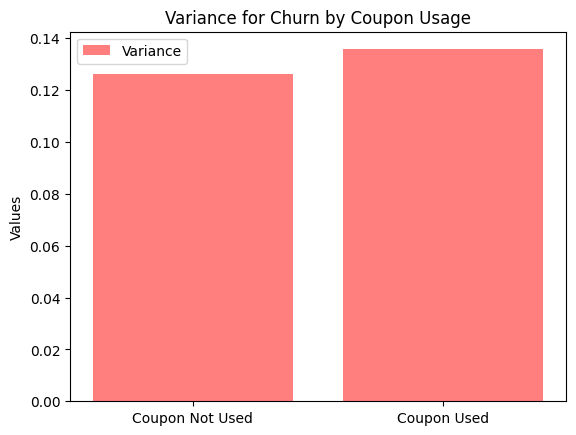

In [150]:
# YOUR CODE HERE: visualize two samples and use the visualization to help you explain the results

import matplotlib.pyplot as plt
import numpy as np

# Get samples of size 500 for 'CouponUsed' and 'Churn'
samples = get_samples(data, 500, "CouponUsed", "Churn")

# Calculate the variances for these samples
variances = [np.var(sample) for sample in samples]

# Check the length of the first sample and the calculated variances
len(samples[0]), variances

# Set the positions and width for the bars
x_pos = [0, 1]

# Set the labels for the bars
labels = ['Coupon Not Used', 'Coupon Used']

# Create the plot
fig, ax = plt.subplots()

# Create bars for variances
ax.bar(x_pos, variances, align='center', alpha=0.5, color='r', label='Variance')

# Create bars for means
#ax.bar(x_pos, means, align='center', alpha=0.5, color='b', label='Mean')

# Add some text for labels, title, and axes ticks
ax.set_ylabel('Values')
ax.set_title('Variance for Churn by Coupon Usage')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.show()


Explain how you'd interpret the results of this test in your own words!

Here we can see the variance values are close to one another, but because our other tests indicated non-normality, we would still proceed with the Chi-Squared test.

## ⚙️ Implement the Chi-Squared Test

In [105]:
# create dataframe from samples
no_coupon_use = pd.DataFrame(samples[0], columns=['Churn'])
no_coupon_use['CouponUsed'] = 0

coupon_use = pd.DataFrame(samples[1], columns=['Churn'])
coupon_use['CouponUsed'] = 1

coupon_df = pd.concat([no_coupon_use, coupon_use])

In [106]:
# set up the frequency table
freq_table = pd.crosstab(coupon_df['CouponUsed'], coupon_df['Churn'])
freq_table

Churn,0,1
CouponUsed,,
0,426,74
1,419,81


In [107]:
# put the data into a list to be used in the chi-squared test
observed = freq_table.values
observed

array([[426,  74],
       [419,  81]])

In [152]:
def test_hypothesis_with_chi_squared(observed: list) -> str:
    """
    Tests the null hypothesis that the coupon use and churn are independent.
    observed (list): the observed values

    Returns:
    str: the result of the test
    """
    chi2, p, dof, expected = st.chi2_contingency(observed)
    print("Chi-squared test statistic:", chi2)
    print("Chi-squared p-value:", p)
    if round(p, 2) <= 0.05:
        print("The null hypothesis that the coupon use and churn are independent is rejected.")
        print("There is a relationship between coupon use and churn.")
    else:
        print("The null hypothesis that the coupon use and churn are independent is accepted.")
        print("There is no relationship between coupon use and churn.")

Chi-squared test is used to determine if there is a significant association between two categorical variables, like coupon use and churn.

To interpret the results of a chi-squared test, follow these steps:

**Calculate the test statistic:** The test statistic is calculated by subtracting the expected frequencies from the observed frequencies, squaring the result, and dividing by the expected frequencies.

**Determine the degrees of freedom:** The degrees of freedom for a chi-squared test are equal to the number of categories minus 1.

**Look up the critical value:** Use a chi-squared distribution table to find the critical value for a given level of significance (e.g. 0.05) and degrees of freedom.

**Compare the test statistic to the critical value:** If the calculated test statistic is greater than the critical value, the null hypothesis is rejected and there is evidence of a significant association between the two categorical variables.

**Report the results:** Report the calculated test statistic, degrees of freedom, critical value, and level of significance. State if the null hypothesis is accepted or rejected and if there is evidence of a significant association between the two categorical variables.

In [153]:
# calculate degrees of freedom
def degrees_of_freedom(categories1, categories2):
    degrees_of_freedom = (categories1 - 1) * (categories2 - 1)
    return degrees_of_freedom

df = degrees_of_freedom(len(data['CouponUsed'].unique()), len(data['Churn'].unique()))
print("Degrees of freedom:", df)


Degrees of freedom: 1


### Calculate the Critical Value

PPF stands for "percent point function". In statistics, the PPF is also known as the inverse cumulative distribution function (CDF). The CDF of a random variable gives the probability that the variable is less than or equal to a given value, while the PPF gives the value at which the CDF equals a given probability.

In the context of the scipy library in Python, the chi2.ppf function is used to get the critical value for a chi-squared test by finding the value at which the cumulative distribution function (CDF) of the chi-squared distribution equals 1 - alpha. In other words, it finds the value at which the CDF equals alpha confidence level.

In [154]:
# calculate the critical value
from scipy.stats import chi2

def get_critical_value(alpha, degrees_of_freedom):
    critical_value = chi2.ppf(1 - alpha, degrees_of_freedom)
    return critical_value

# Example usage
alpha = 0.05
critical_value = get_critical_value(alpha, degrees_of_freedom(len(data['CouponUsed'].unique()), len(data['Churn'].unique())))
print("Critical value:", critical_value)


Critical value: 3.841458820694124


### Review and Interpret the Results

In [155]:
test_hypothesis_with_chi_squared(observed)

Chi-squared test statistic: 0.274861614811987
Chi-squared p-value: 0.6000890472947567
The null hypothesis that the coupon use and churn are independent is accepted.
There is no relationship between coupon use and churn.


In the case where the p-value is exactly 0.05, some practitioners would reject the null hypothesis, while others would fail to reject it. It depends on the researcher's tolerance for Type I errors (rejecting the null hypothesis when it is true) and Type II errors (failing to reject the null hypothesis when it is false). It will also depend on the specific context of your hypothesis test; sometimes the consequences of a Type II error will be worse than a Type I error, but in other cases a Type I error would be worse than a Type II error.

It's important to use a consistent and well-justified approach when dealing with p-values that are exactly equal to the significance level. In some cases, it may be advisable to set a more stringent significance level, such as 0.01 or 0.001, to reduce the risk of making a Type I error. It is important to consider your stakeholders' needs, and the risks of each type of error, when deciding what significance level is most appropriate for your hypothesis test.

What significance level is appropriate, and what you should do when your p-value is exactly at your significance level, will depend on the relative risks of making a Type I error vs. a Type II error. If your null hypothesis is that X product is not making customers sick, a Type II error (failing to reject the null hypothesis when the product really is getting people sick) might be much worse than a Type I error, and so a higher significance level.

Let's try exploring another question!

### Does a Client Satisfaction Score Have a Relationship with Churn?

Ideally, customer satisfaction is a leading indicator of customer churn. Let's test the hypothesis that there is a relationship between customer satisfaction and customer churn.

<Axes: >

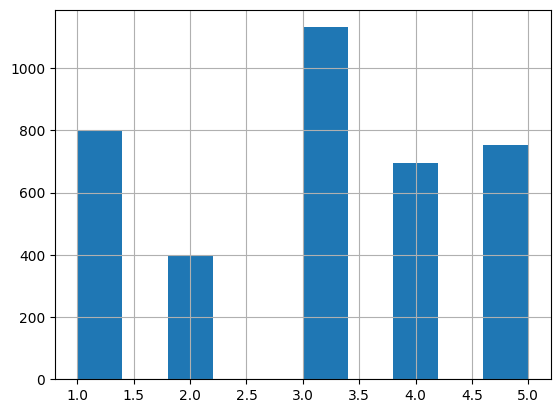

In [156]:
data['SatisfactionScore'].hist()

<Axes: >

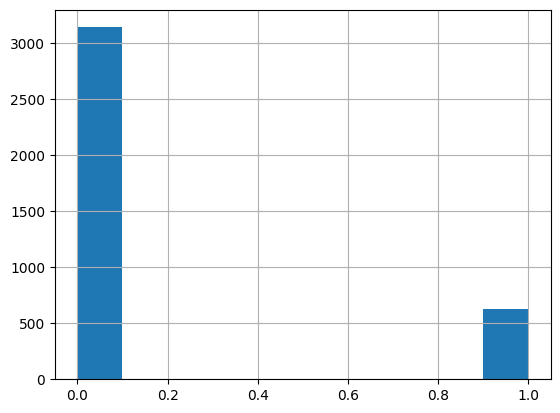

In [157]:
data['Churn'].hist()

### ⚙️ Develop a Hypothesis

💡 Build Intuition: [Review the relevant course material on hypothesis formulation and testing.](https://uplimit.com/course/applied-statistics-for-data-science/v2/module/hypothesis-testing-9mlrk)

Let's set up our null and alternative hypotheses about the relationship between satisfaction score and customer churn.


##### Null Hypothesis ($H_0$)

The median satisfaction scores for customers who have churned and customers who haven't are the same or almost the same.

##### Alternative Hypothesis ($H_1$)

The median satisfaction scores for customers who have churned and customers who haven't are not the same.

In [114]:
# Write a function to return two samples of the same size
def get_two_samples(
    data: pd.DataFrame, sample_size: int, treatment_column: str, outcome_column: str
) -> tuple:
    """
    Returns two samples of the same size from the data.
    data (pd.DataFrame): the data to be used
    sample_size (int): the size of the sample to be returned
    outcome_column (str): the name of the column to be used for the outcome

    Returns:
    list: two samples of the same size
    """
    outcomes = data[outcome_column].unique().tolist()
    outcomes.sort()

    sample_1 = data[data[outcome_column] == outcomes[0]].sample(
        n=sample_size, random_state=random_seed
    )[treatment_column]

    sample_2 = data[data[outcome_column] == outcomes[1]].sample(
        n=sample_size, random_state=random_seed
    )[treatment_column]

    return [sample_1, sample_2]

In [115]:
# write a function to test the null hypothesis that the two groups have the same median with a mann whitney u test
def test_hypothesis_with_mann_whitney_u(samples: list) -> str:
    """
    Tests the null hypothesis that the two groups have the same median.
    samples (list): the list of samples to be used

    Returns:
    str: the result of the test
    """
    u_statistic, p_value = st.mannwhitneyu(*samples)
    print("Mann-Whitney U test statistic:", u_statistic)
    print("Mann-Whitney U p-value:", p_value)
    if round(p_value, 2) <= 0.05:
        print("The null hypothesis that the two groups have the same median is rejected.")
        print("There is a relationship between satisfaction score and churn.")
    else:
        print("The null hypothesis that the two groups have the same median is accepted.")
        print("There is no detectable relationship between satisfaction score and churn.")

To interpret the results of a Mann-Whitney U test, you need to compare the U statistic to the critical value. The critical value is calculated based on the sample sizes and the level of significance (e.g., alpha = 0.05). If the U statistic is less than the critical value, it suggests that the two samples come from populations with different medians and you reject the null hypothesis that the populations have equal medians. Conversely, if the U statistic is greater than or equal to the critical value, it suggests that the two samples come from populations with similar medians and you fail to reject the null hypothesis.

In addition to the U statistic and the critical value, you can also calculate a p-value for the Mann-Whitney U test. The p-value is the probability of observing a U statistic as extreme or more extreme than the observed U statistic, given that the null hypothesis is true. If the p-value is less than the level of significance, you reject the null hypothesis. If the p-value is greater than or equal to the level of significance, you fail to reject the null hypothesis.

It is important to keep in mind that the Mann-Whitney U test is a two-tailed test, which means that it tests for differences in either direction (i.e., one sample has a higher median or one sample has a lower median). If you are interested in testing for a specific direction of difference (e.g., one sample has a higher median), you need to adjust the level of significance or use a one-tailed test.

In [116]:
test_hypothesis_with_mann_whitney_u(
    get_two_samples(data, 500, "SatisfactionScore" , "Churn")
)

Mann-Whitney U test statistic: 104154.5
Mann-Whitney U p-value: 2.714438522431475e-06
The null hypothesis that the two groups have the same median is rejected.
There is a relationship between satisfaction score and churn.


In [117]:
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,NumberOfCouponsUsed
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,2,Single,9,1,11.0,1,1.0,5.0,160,1.0
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,...,5,Single,8,0,23.0,0,1.0,3.0,134,0.0
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,...,5,Single,2,1,22.0,1,6.0,7.0,139,4.0
11,50012,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,...,3,Single,10,1,13.0,0,1.0,0.0,154,0.0
12,50013,1,0.0,Phone,1,11.0,COD,Male,2.0,3,...,3,Single,2,1,13.0,1,2.0,2.0,134,2.0


### Does a Preferred Device Have a Relationship with DaySinceLastOrder?

While CostPro tries to maintain a high quality customer experience across the board, it might be possible that certain methods of interfacing with CostPro have a relationship with days since last order. This is another way to get at the problem of churn.

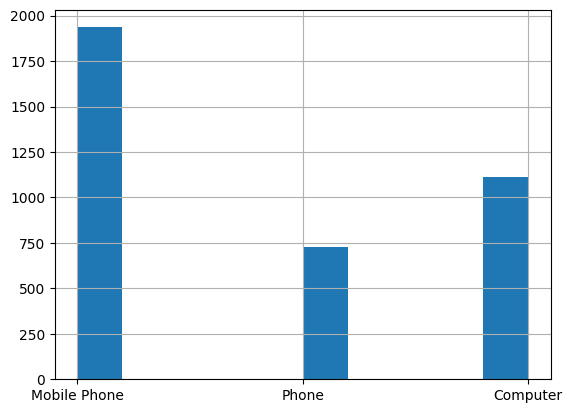

In [118]:
data['PreferredLoginDevice'].hist();

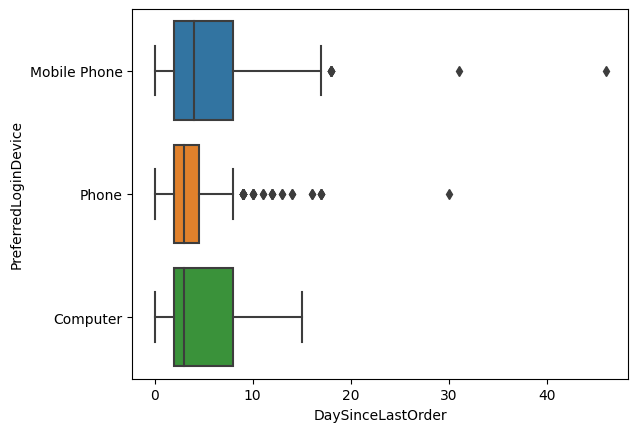

In [119]:
sns.boxplot(data=data, x='DaySinceLastOrder', y='PreferredLoginDevice');

##### Null Hypothesis ($H_0$)

There is no relationship between preferred login device and churn.

##### Alternative Hypothesis ($H_1$)

There is a relationship between preferred login device and churn.

In [120]:
samples = get_samples(data, 500, 'PreferredLoginDevice', 'DaySinceLastOrder')

the independent variable list is ['Computer', 'Mobile Phone', 'Phone']


In [121]:
# write a function to test the null hypothesis that n groups have the same mean using the kruskal wallis test
def test_hypothesis_with_kruskal_wallis(samples: list) -> str:
    """
    Tests the null hypothesis that n groups have the same mean.
    samples (list): the list of samples to be used

    Returns:
    str: the result of the test
    """
    stat, p_value = st.kruskal(*samples)
    print("Kruskal-Wallis test statistic:", stat)
    print("Kruskal-Wallis p-value:", p_value)
    if round(p_value, 2) <= 0.05:
        print("The null hypothesis that n groups have the same median is rejected.")
        print("There is a relationship between preferred login device and days since last order.")
    else:
        print("The null hypothesis that n groups have the same mean is accepted.")
        print("There is no significant relationship between preferred login device and days since last order.")

To interpret the results of a Kruskal-Wallis test, you will need to determine the p-value. The p-value is the probability of obtaining a test statistic as extreme or more extreme than the observed test statistic, under the null hypothesis. A small p-value indicates that the difference between the medians is statistically significant and that you should reject the null hypothesis.

If the p-value is less than your chosen level of significance, such as 0.05, you can reject the null hypothesis and conclude that there is evidence of a difference in medians between at least two of the groups.

It is important to keep in mind that the Kruskal-Wallis test provides a test of the overall difference between the medians of the groups, but it does not tell you which groups are different or how they are different. To further explore the differences between the groups, you may want to perform post-hoc tests.



In [122]:
test_hypothesis_with_kruskal_wallis(samples)

Kruskal-Wallis test statistic: 69.22659202001135
Kruskal-Wallis p-value: 9.281892673597712e-16
The null hypothesis that n groups have the same median is rejected.
There is a relationship between preferred login device and days since last order.


##### Interpret the Result

Practice explaining this result to a business stakeholder by writing your interpretation. Remember to interpret the test in a way that is appropriate for your audience. If there's a helpful data visualization, please include it.

YOUR WORDS HERE


## Your Turn

Develop and test hypotheses!

### ⚙️ Develop a Hypothesis

💡 Build Intuition: [Review the relevant course material on hypothesis formulation and testing.](https://uplimit.com/course/applied-statistics-for-data-science/v2/module/hypothesis-testing-9mlrk)

Try formulating a hypothesis that you can test with a chi-squared test.

Remember that chi-squared is a way to test categorical variables in a contingency table.


##### Null Hypothesis ($H_0$)

Filing complaints has no effect on churn.

##### Alternative Hypothesis ($H_1$)

Customers who have filed complaints churn more frequently.

In [160]:
# Extracting the samples for the "Complaints" hypothesis
samples_complaints = get_two_samples(data, 500, "Complain", "Churn")

# Running the Mann-Whitney U test for the "Complaints" hypothesis
test_hypothesis_with_mann_whitney_u(samples_complaints)

Mann-Whitney U test statistic: 94250.0
Mann-Whitney U p-value: 1.3562324979049662e-15
The null hypothesis that the two groups have the same median is rejected.
There is a relationship between satisfaction score and churn.


In [161]:
# display the cross tabulation
pd.crosstab(data['Complain'], data['Churn'])

Churn,0,1
Complain,,
0,2407,302
1,736,329


In [162]:
# Generate a new frequency table for the Complain and Churn fields
freq_table_complain_churn = pd.crosstab(data['Complain'], data['Churn'])
observed_complain_churn = freq_table_complain_churn.values

# Function to test the hypothesis using Chi-Squared Test
def test_hypothesis_with_chi_squared(observed: np.ndarray) -> str:
    chi2, p, dof, expected = st.chi2_contingency(observed)
    print("Chi-squared test statistic:", chi2)
    print("Chi-squared p-value:", p)
    if round(p, 2) <= 0.05:
        print("The null hypothesis that Complain and Churn are independent is rejected.")
        print("There is a relationship between Complain and Churn.")
    else:
        print("The null hypothesis that Complain and Churn are independent is accepted.")
        print("There is no detectable relationship between Complain and Churn.")


Run a chi-squared test and report the results.


In [163]:
# Run the chi-squared test
test_hypothesis_with_chi_squared(observed_complain_churn)


Chi-squared test statistic: 212.6055753409504
Chi-squared p-value: 3.7103886049205616e-48
The null hypothesis that Complain and Churn are independent is rejected.
There is a relationship between Complain and Churn.


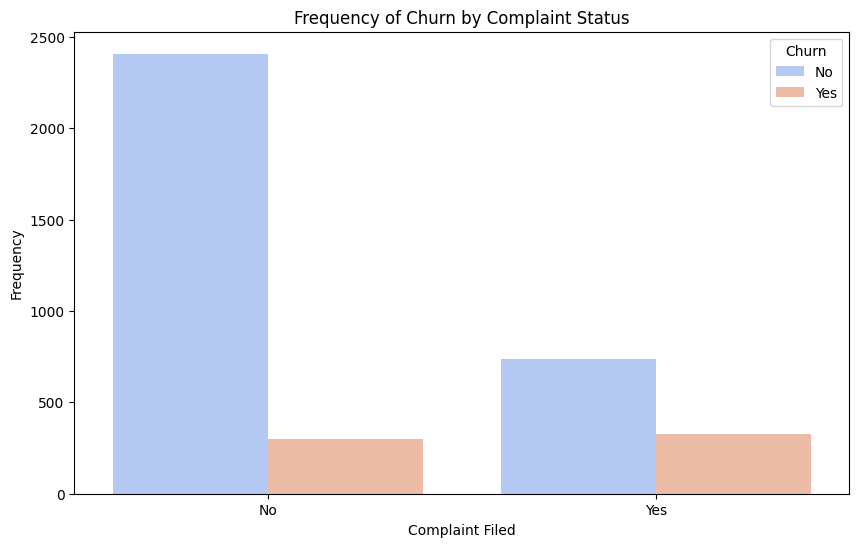

In [164]:
# visualize the results
# Create a bar graph of frequencies for "Complain" and "Churn"
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Complain', hue='Churn', palette="coolwarm")
plt.title("Frequency of Churn by Complaint Status")
plt.xlabel("Complaint Filed")
plt.ylabel("Frequency")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


In [128]:
# evaluate the results

# The intuitive understanding that complaints are correlated with increased chrun appears to hold true in the dataset.

#### ⚙️ Develop Your Hypothesis

💡 Build Intuition: [Review the relevant course material on hypothesis formulation and testing.](https://uplimit.com/course/applied-statistics-for-data-science/v2/module/hypothesis-testing-9mlrk)

Now, develop and test a hypothesis with a test of your own choosing.

##### Null Hypothesis

$H_0$: The distance from the warehouse to the home has no effect on the likelihood of a complaint being filed.

##### Alternative Hypothesis

Write your alternative hypothesis here.

$H_1$: The distance from the warehouse to the home affects the likelihood of a complaint being filed.

In [129]:
# get the samples

In [130]:
# define the test function


In [168]:
# run the test

# Point-Biserial Correlation Coefficient calculation
point_biserial_corr, p_value = st.pointbiserialr(data['Complain'], data['WarehouseToHome'])

point_biserial_corr, p_value

print('Point-Biserial Correlation Coefficient results:')
print(f'point_biserial_corr: {point_biserial_corr}')
print(f'p_value: {p_value}')


Point-Biserial Correlation Coefficient results:
point_biserial_corr: 0.003828553594083968
p_value: 0.8141139962227575


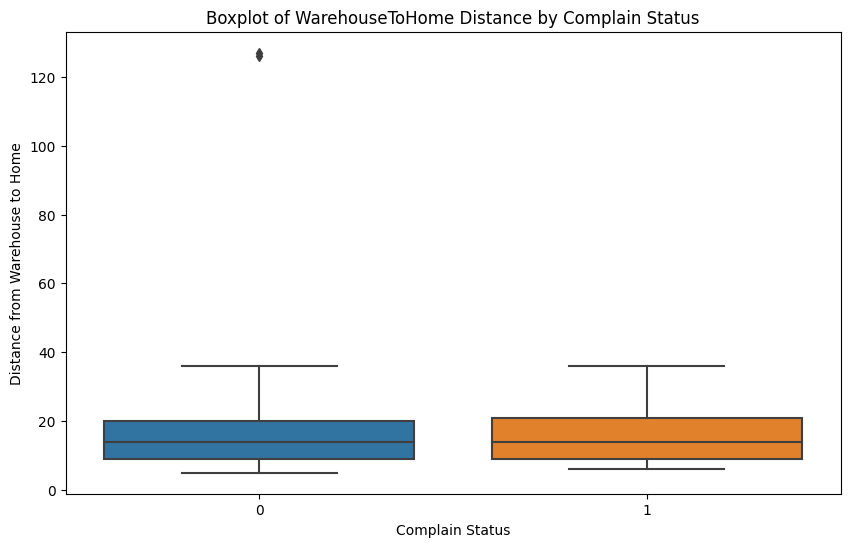

In [167]:
# visualize the results
# Generating boxplot to visualize the range and IQR for "WarehouseToHome" based on "Complain" status

plt.figure(figsize=(10, 6))

sns.boxplot(x='Complain', y='WarehouseToHome', data=data)

plt.title('Boxplot of WarehouseToHome Distance by Complain Status')

plt.xlabel('Complain Status')

plt.ylabel('Distance from Warehouse to Home')

plt.show()

In [133]:
# evaluate the result
# We failed to reject the null hypothesis. There is not a statistically meaningful relationship between shipping distance from the warehouse and complaint indicator.

## Interpret the Result

Practice explaining this result to a business stakeholder by writing your interpretation. Remember to interpret the test in a way that is appropriate for your audience. If there's a helpful data visualization, please include it.

### Objective

We wanted to understand if the distance from our warehouse to a customer's home has any impact on whether they file a complaint.

### Methodology

We analyzed a representative sample of customer data, focusing on two key variables:

    Complain:
    Whether a customer has filed a complaint (Yes/No)
    
    WarehouseToHome:
    The distance from our warehouse to the customer's shipping address

### Key Findings

#### Similar Median Distances
The "middle" distance from the warehouse to home is roughly the same for both customers who have and haven't complained.

#### Comparable Distance Ranges
The range of distances (from the shortest to the longest) is also quite similar for both groups.

### Interpretation
Our analysis indicates that the distance from the warehouse to a customer's home is not a strong predictor of whether they will file a complaint. Both those who have and haven't complained show similar patterns in terms of shipping distance.

### Business Implications
#### No Need for Geographical Adjustments
Based on this data, there's no immediate need to consider the warehouse-to-home distance as a factor in our customer complaint mitigation strategies.

#### Look Elsewhere for Solutions
Since distance doesn't appear to be a factor in complaints, we may need to explore other areas like shipping speed, product quality, or customer service for potential improvements.